In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LinearRegression

from data import DataLoader
from db import make_session, d_models
import lin_fit
from plot import set_font_size, unity_line

import CONFIG as C
import LOCAL_SETTINGS as L

In [2]:
FILT = [d_models.Trial.expt == 'driven_random']

session = make_session()
trials = session.query(d_models.Trial).filter(*FILT).all()
session.close()

for ctr, trial in enumerate(trials):
    print('Loading data for trial {}/{} ({})'.format(ctr+1, len(trials), trial.name))
    trials[ctr].dl = DataLoader(trial, sfx='0', vel_filt=None)

Loading data for trial 1/5 (20170428.Fly1.5)
Loading clean data from file "clean_0.csv"...
Loading data for trial 2/5 (20170428.Fly2.4)
Loading clean data from file "clean_0.csv"...
Loading data for trial 3/5 (20170428.Fly5.4)
Loading clean data from file "clean_0.csv"...
Loading data for trial 4/5 (20170428.Fly5.5)
Loading clean data from file "clean_0.csv"...
Loading data for trial 5/5 (20170428.Fly1.4)
Loading clean data from file "clean_0.csv"...


In [3]:
keys = {0: [], 1: []}
ts = {0: {}, 1: {}}
ddt_g4ds = {0: {}, 1: {}}
speeds = {0: {}, 1: {}}
v_angs = {0: {}, 1: {}}
v_airs = {0: {}, 1: {}}

for trial in trials:
    for e_ctr, (t_start, t_end) in enumerate(C.DRIVEN_RANDOM_EPOCHS):
        key = '{} ({})'.format(trial.name, t_start)
        
        t = trial.dl.t
        mask = (t_start <= t) & (t < t_end)
        
        keys[e_ctr].append(key)
        
        ts[e_ctr][key] = trial.dl.t[mask].copy()
        ddt_g4ds[e_ctr][key] = trial.dl.ddt_g4d[mask]
        speeds[e_ctr][key] = trial.dl.speed[mask]
        v_angs[e_ctr][key] = trial.dl.v_ang[mask]  
        v_airs[e_ctr][key] = trial.dl.v_air[mask]

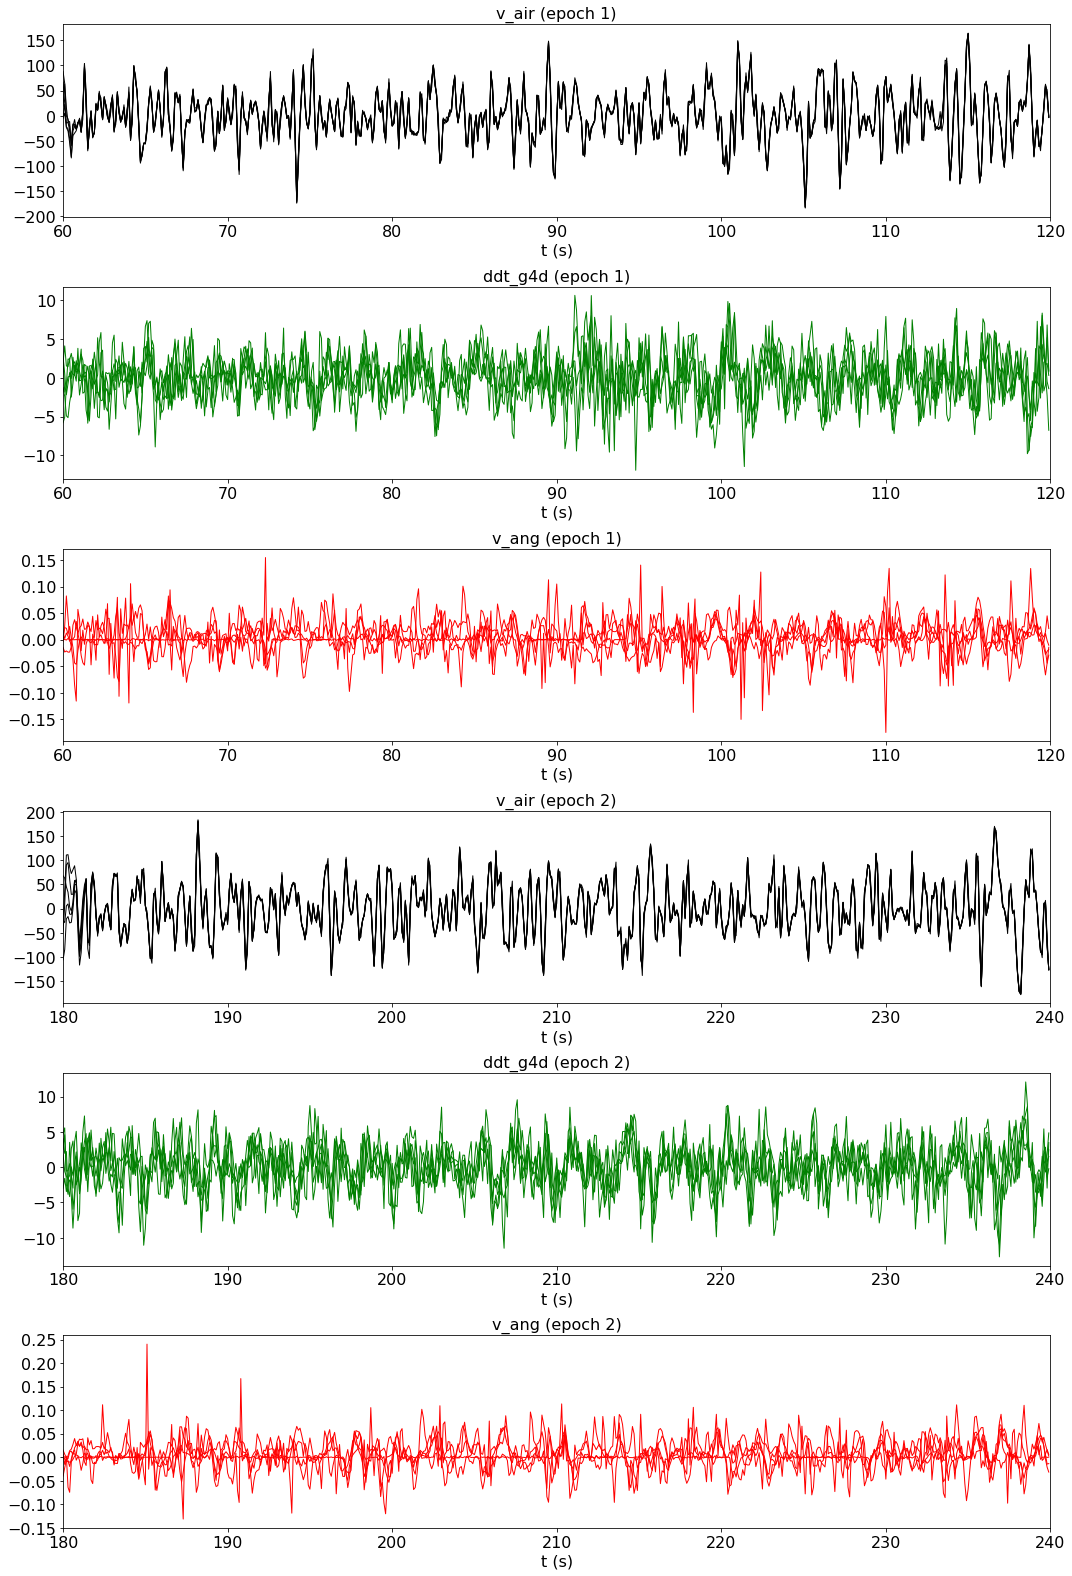

In [4]:
fig, axs = plt.subplots(6, 1, figsize=(15, 22), tight_layout=True, squeeze=False)
axs = axs[:, 0]

for ctr, key in enumerate(keys[0]):
    axs[0].plot(ts[0][key], v_airs[0][key], color='k', lw=1)
    axs[1].plot(ts[0][key], ddt_g4ds[0][key], color='g', lw=1)
    axs[2].plot(ts[0][key], v_angs[0][key], color='r', lw=1)
    
for ctr, key in enumerate(keys[1]):
    axs[3].plot(ts[1][key], v_airs[1][key], color='k', lw=1)
    axs[4].plot(ts[1][key], ddt_g4ds[1][key], color='g', lw=1)
    axs[5].plot(ts[1][key], v_angs[1][key], color='r', lw=1)

axs[0].set_xlim(*C.DRIVEN_RANDOM_EPOCHS[0])
axs[0].set_xlabel('t (s)')
axs[0].set_title('v_air (epoch 1)')
axs[1].set_xlim(*C.DRIVEN_RANDOM_EPOCHS[0])
axs[1].set_xlabel('t (s)')
axs[1].set_title('ddt_g4d (epoch 1)')
axs[2].set_xlim(*C.DRIVEN_RANDOM_EPOCHS[0])
axs[2].set_xlabel('t (s)')
axs[2].set_title('v_ang (epoch 1)')

axs[3].set_xlim(*C.DRIVEN_RANDOM_EPOCHS[1])
axs[3].set_xlabel('t (s)')
axs[3].set_title('v_air (epoch 2)')
axs[4].set_xlim(*C.DRIVEN_RANDOM_EPOCHS[1])
axs[4].set_xlabel('t (s)')
axs[4].set_title('ddt_g4d (epoch 2)')
axs[5].set_xlim(*C.DRIVEN_RANDOM_EPOCHS[1])
axs[5].set_xlabel('t (s)')
axs[5].set_title('v_ang (epoch 2)')

for ax in axs:
    ax.axvline(0, color='gray', ls='--')
    set_font_size(ax, 16)